# Part II - PROSPER LOAN DATA SET
## by SAMUEL GICHOBI



## Investigation Overview


> The data wrangling and visualization efforts set to explore the factors that influence the loan status that is the ability of people to take loans, pay them, and also those who fail to pay (defaulters) and those which are charged off (written off) and overdue.

## Dataset Overview

>The data set is on the propser loan data that examines the number of people who have completed their loans or not. The data set contains 113937 columns and 81 rows.The main interest from this dataset is to examine the factors that influence the loan status and if more people currently have loans, defaulted, or paid off their loans.Some of the features that I will consider exploring in this data include LoanStatus, borrowerate, lender yield, ProsperScore, occupation, Term, Employment Status, Employment Status Duration, IsBorrowerHomeowner,Total Credit Lines Past 7 Years, Delinquencies Last 7 Years, Debt to Income Ratio, Income Range, Income Verifiable, Loan Orginal Date, Loan Orginal AMount, Monthly Repayment, 

In [1]:
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline



In [2]:
# load in the dataset into a pandas dataframe
fin_data = pd.read_csv('prosperLoanData.csv')
fin_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
fin_data.drop(columns = ['ListingKey','ListingNumber', 'CreditGrade', 'BorrowerAPR','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)','ListingCategory (numeric)','CurrentlyInGroup','GroupKey','DateCreditPulled','CreditScoreRangeLower','CreditScoreRangeUpper','FirstRecordedCreditLine','CurrentCreditLines','OpenCreditLines','OpenRevolvingAccounts','OpenRevolvingMonthlyPayment','InquiriesLast6Months','TotalInquiries','CurrentDelinquencies','AmountDelinquent','PublicRecordsLast10Years','PublicRecordsLast12Months','RevolvingCreditBalance','BankcardUtilization','AvailableBankcardCredit','TotalTrades','TradesNeverDelinquent (percentage)','TradesOpenedLast6Months','LoanKey','TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent','LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination','LoanNumber','LoanOriginationQuarter','MemberKey','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees','LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss','LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments','PercentFunded','Recommendations','InvestmentFromFriendsCount','InvestmentFromFriendsAmount','Investors'],inplace = True)

In [4]:
fin_data['ListingCreationDate'] = pd.to_datetime(fin_data['ListingCreationDate'], errors = 'coerce').dt.strftime('%d-%m-%y')
fin_data['LoanOriginationDate'] = pd.to_datetime(fin_data['LoanOriginationDate'], errors = 'coerce').dt.strftime('%d-%m-%y')
fin_data['ClosedDate'] = pd.to_datetime(fin_data['ClosedDate'], errors = 'coerce').dt.strftime('%d-%m-%y')

In [5]:
fin_data.set_index('LoanOriginationDate', inplace = True)

In [6]:
fin_data.sort_index(inplace = True)

In [7]:
fin_data.rename(columns = lambda x:x.strip().lower().replace('', ''), inplace = True)

In [8]:
fin_data[fin_data['occupation'].isna()].head(2)

,listingcreationdate,term,loanstatus,closeddate,borrowerrate,lenderyield,prosperscore,borrowerstate,occupation,employmentstatus,employmentstatusduration,isborrowerhomeowner,totalcreditlinespast7years,delinquencieslast7years,debttoincomeratio,incomerange,incomeverifiable,statedmonthlyincome,loanoriginalamount,monthlyloanpayment
LoanOriginationDate,,,,,,,,,,,,,,,,,,,,
01-03-06,NaN,36,Completed,01-03-09,0.146,0.1410,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0.15773,Not displayed,True,3500.0,6500,218.58
01-03-06,13-10-22,36,Defaulted,30-06-07,0.230,0.2125,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0.04387,Not displayed,True,2250.0,2550,98.71


In [9]:
fin_data.dropna(subset = ['occupation'], how = 'all', inplace = True)

In [10]:
sum(fin_data['occupation'].isna())

0

In [11]:
ordinal_var_dict = {'employmentstatus': ['Employed','Full-time','Part-time','Self-employed','Retired','Other','Not employed','Not available'],
                    'incomerange':['0','Not displayed','Not employed', '$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
                   'loanstatus': ['Current','Completed','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Chargedoff','Defaulted','Cancelled']}     
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    fin_data[var] = fin_data[var].astype(ordered_var)

In [12]:
categoric_var = ['loanstatus','employmentstatus','incomerange']
numeric_var = ['term', 'borrowerrate','lenderyield','prosperscore','employmentstatusduration','totalcreditlinespast7years','delinquencieslast7years','debttoincomeratio','statedmonthlyincome','loanoriginalamount','monthlyloanpayment']

In [13]:
#Set the style of displaying the Visual
plt.style.use('ggplot')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## COUNT OF LOAN STATUS

> The total count of the loan status to find out the count of loan status in ascending order. It can be observed that most borrowers have loans currently running and a good number of people having completed their loans. The charged off and default loans is low as well as those with overdue loans.

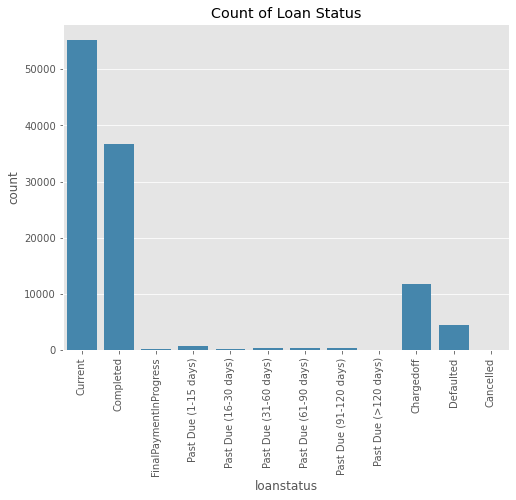

In [14]:
plt.figure(figsize = (8,6))
#Get the defualt color
default_color = sb.color_palette()[1]
#plot the bar graph of count of oan status
sb.countplot(data = fin_data, x = 'loanstatus', color = default_color)
#Rotate the x axis
plt.xticks(rotation = '90')
plt.title('Count of Loan Status')
plt.show()

## CORRELATION AMONG NUMERIC VARIABLES (Borrower Rate & Lender Yield Relation)

> The presented heat map reveals positive, negative, and no correlation among numeric variables. It can be observed there exists a strong and positive relationship between the borrower rate and lender yield. A weak negative relationship exists between debt to income ratio and stated monthly income. Therefore, we can conclude that lender's yield directly translate to the borrower rate while a high debt to income ratio has a weak inverse relation to the borrowers monthly income.

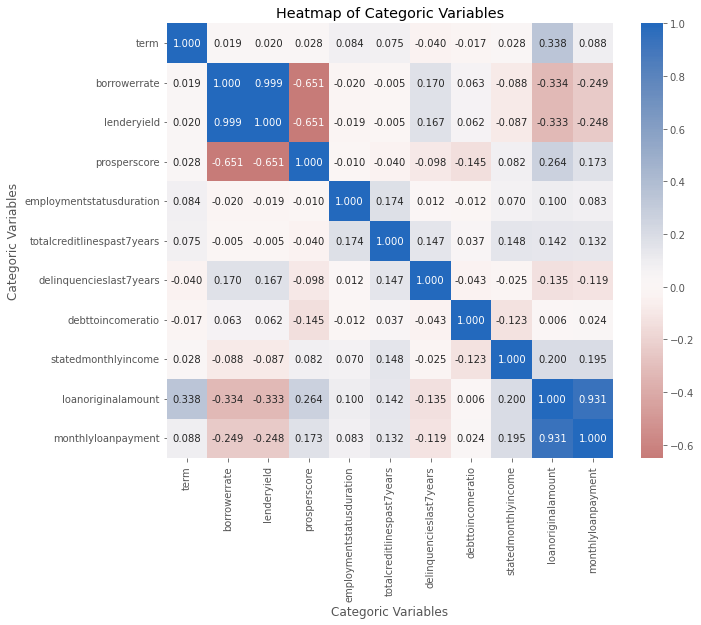

In [15]:
#Get the plot size
plt.figure(figsize = (10,8))
#Plot the graph
sb.heatmap(fin_data[numeric_var].corr(),annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Heatmap of Categoric Variables')
#Create the x and y labels
plt.xlabel('Categoric Variables')
plt.ylabel('Categoric Variables')
plt.show()

## LOAN STATUS & INCOME RANGE BY LOAN ORIGINAL AMOUNT AND BORROWER RATE
It can be seen  that those with a high loan original amount have current loans running while those with lower loans have equally completed their loans and others charged off and defaulted. For those with overdue loans, both borrowers with high original loan amount and low have loans overdue.

The borrower rate shows that borrowers with high rates have pending loans while those with lower rates have completed their loans and those with higher rates have their loans charged off. Borrowers with who defaulted equally have higher rates compared to those who have completed or have current loans. Those with overdue loans have their rates varying between 0.20 and 0.33.

<Figure size 288x360 with 0 Axes>

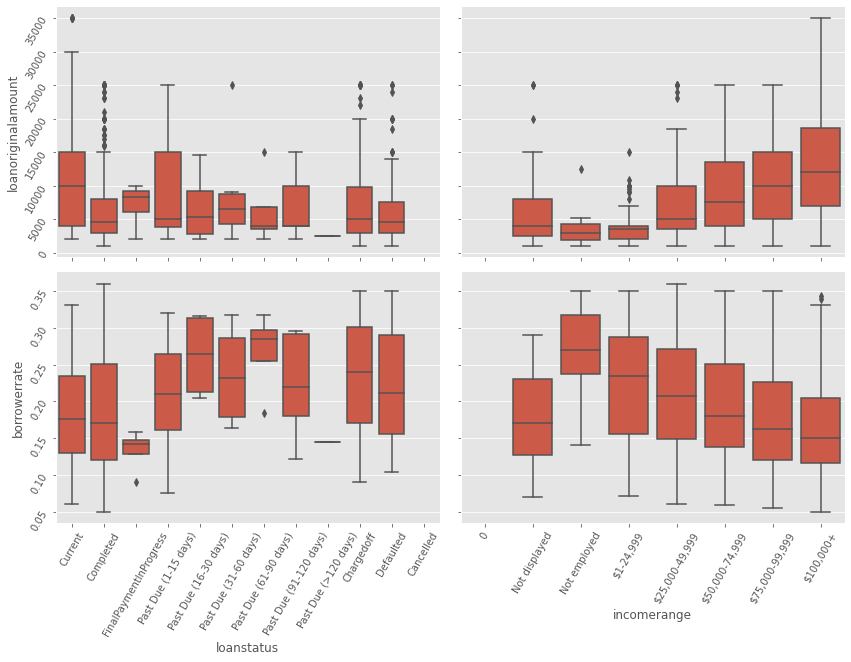

In [16]:
#Get as sample of 2000
fin_data_samp = fin_data.sample(n = 2000, replace = False)
#Get the default color
default_color = sb.color_palette()[3]
#Create a function
def boxgrid(x,y , **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = default_color)
#Get the size
plt.figure(figsize = (4,5))
#Plot the graph
g = sb.PairGrid(data = fin_data_samp, y_vars=['loanoriginalamount','borrowerrate'], x_vars=['loanstatus', 'incomerange'], size = 4, aspect =1.5)
g.map(boxgrid, color = default_color)
#Rotate the graphs x axis
for ax in g.axes.flatten():
    ax.tick_params(rotation = 60)
plt.show()

LOAN STATUS BY LOAN ORIGINAL AMOUNT AND MONTHLY LOAN PAYMENT
    
Borrowers with current loans may pay monthly payment of between 100 and 800 dollars with an exception of few who pay higher monthly payments. A similar linear trend can be obsevered for those who have completed their loans and borrow between 5000 and 25000 pay monthly payments of between 50 and 800 dollars with few paying higher and lower payments. Defaulters and those  whose loans struggle to pay high monthly payments and make monthly paymnents of between 100 and 800 dollars. Borrowers with overdue loans pay between 100 and 800 dollars with some exceptions where some people prefer to make higher payments. Therefore, it can be seen that the loan monthly payment depends with the loan original amount with those with higher loans paying more but this is also left to the borrowers discretion as we can see instances where the person borrows less and pays more or borrows more and pays less but these are few.

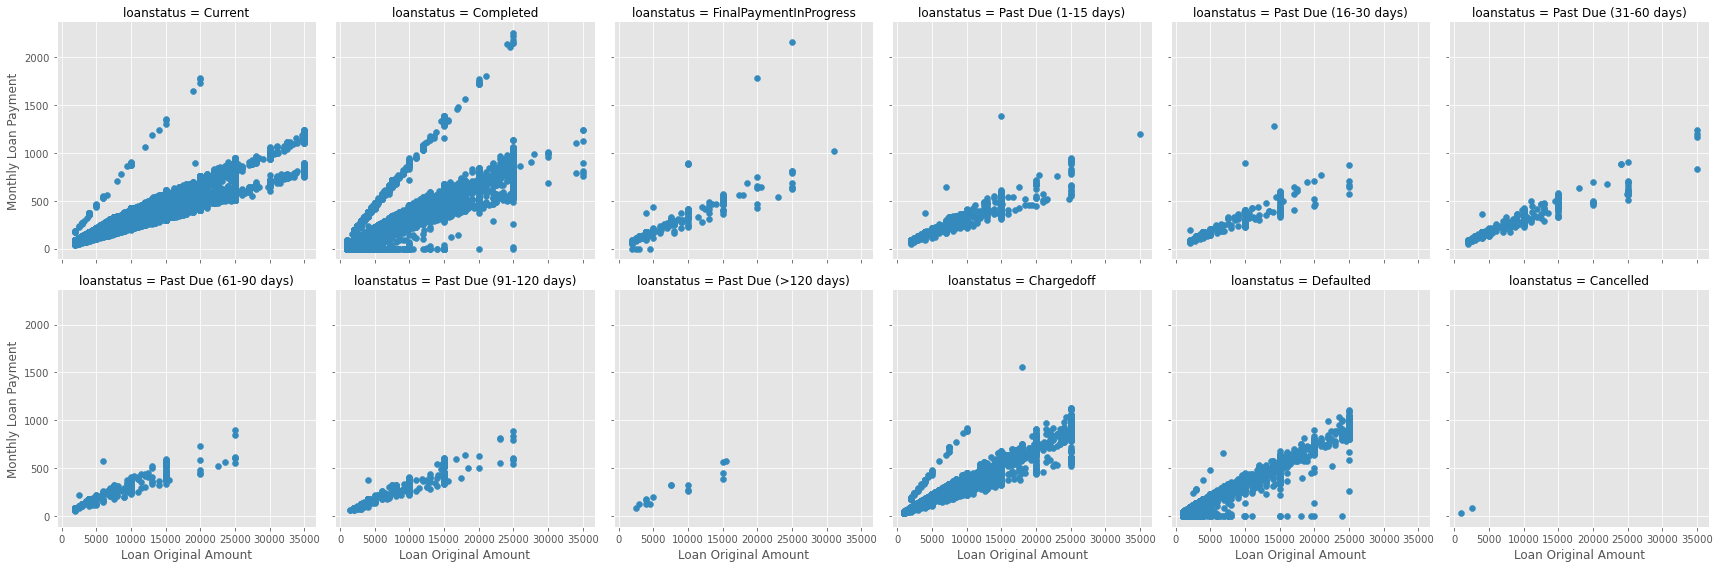

In [17]:
#Plot the FacetGrid
g = sb.FacetGrid(data = fin_data, col = 'loanstatus', col_wrap = 6, size = 4 , margin_titles = True)
#Get the default color
default_color = sb.color_palette()[1]
#Map the scatter plot
g.map(plt.scatter, 'loanoriginalamount','monthlyloanpayment', color = default_color)
#Set the X and Y Labels
g.set_xlabels('Loan Original Amount')
g.set_ylabels('Monthly Loan Payment')

COUNT OF INCOME RANGE & EMPLOYMENT STATUS BY LOAN STATUS AND EMPLOYMENT STATUS

The visual showed that most borrowers with current loans were employed individuals who are equally high income earners which ranges between 25000 and 100000+. It can also be noted that the number of defaulters and charged off loans decrease with an increase with income while those with a lower income bracket individuals complete their loans faster compared to those with a higher income. It can be seen that those in the income bracket of between 50000 and 75000 have incomplete loans and are the majority are the employed. Similarly, it can be seen across the various income brackets that majority of people are those who are employed. Hence we can conclude that majority of people with loans are employed with an income bracket of between (50000 and 75000).

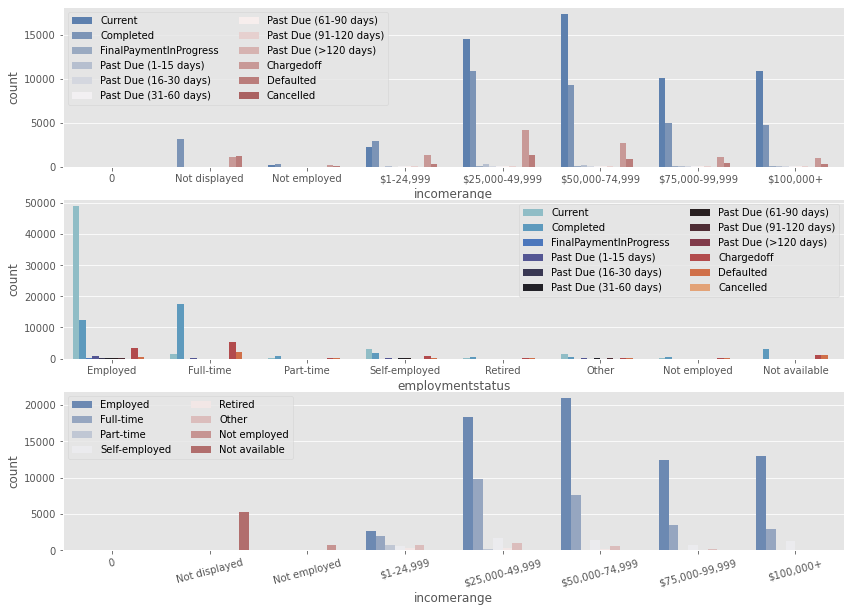

In [18]:
#Get the size
plt.figure(figsize = (14,10))

#Plot the respective plots
#plot 1
ax =plt.subplot(3,1,1)
sb.countplot(data = fin_data, x = 'incomerange', hue = 'loanstatus', palette = 'vlag')
ax.legend(loc = 2, ncol = 2)
#plot 2
ax = plt.subplot(3,1,2)
sb.countplot(data = fin_data, x = 'employmentstatus', hue = 'loanstatus' , palette = 'icefire')
ax.legend(loc = 1, ncol = 2)
#plot 3
ax = plt.subplot(3,1,3)
sb.countplot(data = fin_data, x = 'incomerange', hue = 'employmentstatus' , palette = 'vlag')
ax.legend(loc = 2, ncol = 2)
#Rotate the X axis
plt.xticks(rotation = 15)
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [19]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Slide_Deck_Template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Slide_Deck_Template.ipynb to slides
[NbConvertApp] Writing 1057152 bytes to Part_II_Slide_Deck_Template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
